In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from keras import layers
import tensorflow as tf
from keras.layers import Flatten
from keras.layers import Dropout

In [2]:
fb =pd.read_csv('/Users/anuhyakalvakala/Downloads/fb_sentiment_4.csv')

In [4]:
fb.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [5]:
fb.columns = map(str.lower, fb.columns)
fb.columns

Index(['unnamed: 0', 'fbpost', 'label'], dtype='object')

In [6]:
fb.shape

(1000, 3)

In [7]:

fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [8]:
fb['fbpost']

0      drug runners and  a us senator have something ...
1      heres a single to add to kindle just read this...
2      if you tire of nonfiction check out httpwwwama...
3         ghost of round island is supposedly nonfiction
4      why is barnes and nobles version of the kindle...
                             ...                        
995    i liked it  its youth oriented and i think thi...
996    i think the point of the commercial is that ev...
997    kindle 3 is such a great product i could not b...
998    develop a way to share books  that is a big dr...
999                                    i love my kindle 
Name: fbpost, Length: 1000, dtype: object

In [9]:
fb = fb[fb.label != "O"]

In [150]:
fb

,unnamed: 0,fbpost,label
4,4,why is barnes and nobles version of the kindle...,N
5,5,maria do you mean the nook be careful books ...,P
6,6,kindle is awesome mines great,P
7,7,i love mine,P
8,8,meh i think singles are a bad idea big name au...,N
...,...,...,...
995,995,i liked it its youth oriented and i think thi...,P
996,996,i think the point of the commercial is that ev...,P
997,997,kindle 3 is such a great product i could not b...,P
998,998,develop a way to share books that is a big dr...,N


In [10]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)
X = pad_sequences(X)

In [11]:
fb.label

4      N
5      P
6      P
7      P
8      N
      ..
995    P
996    P
997    P
998    N
999    P
Name: label, Length: 720, dtype: object

In [12]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(648, 203) (648, 2)
(72, 203) (72, 2)


In [13]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [14]:
embed_dim = 200
lstm_out = 200

model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())

model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

#model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
#
#model.add(layers.Dense(48, activation='relu'))
#model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#classifier = model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_test, Y_test))
batch_size = 10
hist = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,validation_data=(X_test, Y_test))
model.save('/Users/anuhyakalvakala/Desktop/sc/comment_model.h5')

2022-12-11 21:29:00.507118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 21:29:00.507509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x17c34e500>>
Epoch 1/10


2022-12-11 21:29:00.826746: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 21:29:01.056619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 21:29:03.099809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 - 3s - loss: 7.9443 - accuracy: 0.8287 - val_loss: 4.0405 - val_accuracy: 0.8056 - 3s/epoch - 39ms/step
Epoch 2/10
65/65 - 0s - loss: 1.7424 - accuracy: 0.9120 - val_loss: 6.1489 - val_accuracy: 0.8889 - 439ms/epoch - 7ms/step
Epoch 3/10
65/65 - 0s - loss: 0.7713 - accuracy: 0.9120 - val_loss: 4.1572 - val_accuracy: 0.8056 - 439ms/epoch - 7ms/step
Epoch 4/10
65/65 - 0s - loss: 0.5206 - accuracy: 0.9475 - val_loss: 3.5839 - val_accuracy: 0.8472 - 443ms/epoch - 7ms/step
Epoch 5/10
65/65 - 1s - loss: 0.2153 - accuracy: 0.9738 - val_loss: 3.9087 - val_accuracy: 0.8750 - 551ms/epoch - 8ms/step
Epoch 6/10
65/65 - 0s - loss: 0.2150 - accuracy: 0.9645 - val_loss: 3.7160 - val_accuracy: 0.8611 - 488ms/epoch - 8ms/step
Epoch 7/10
65/65 - 0s - loss: 0.2005 - accuracy: 0.9645 - val_loss: 3.6975 - val_accuracy: 0.8889 - 443ms/epoch - 7ms/step
Epoch 8/10
65/65 - 0s - loss: 0.1478 - accuracy: 0.9784 - val_loss: 3.5219 - val_accuracy: 0.8750 - 428ms/epoch - 7ms/step
Epoch 9/10
65/65 - 0s - loss:

In [141]:

import pickle
pickle.dump(model,open('/Users/anuhyakalvakala/Downloads/model_cmt.pkl','wb'))

INFO:tensorflow:Assets written to: ram://35239175-32a0-41e1-a3f2-2f934ecb78e6/assets


In [156]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               52224     
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 2)                 130       
                                                                 
Total params: 93,506
Trainable params: 93,506
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

3/3 [==============================] - 0s 18ms/step - loss: 3.5579 - accuracy: 0.8472
score: 3.56
accuracy: 0.85


In [68]:
batch_size = 10
hist = model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
49/49 - 2s - loss: 1.5515 - accuracy: 0.8983 - 2s/epoch - 36ms/step
Epoch 2/7
49/49 - 0s - loss: 0.9121 - accuracy: 0.9004 - 473ms/epoch - 10ms/step
Epoch 3/7
49/49 - 0s - loss: 0.4169 - accuracy: 0.9315 - 451ms/epoch - 9ms/step
Epoch 4/7
49/49 - 0s - loss: 0.2897 - accuracy: 0.9523 - 371ms/epoch - 8ms/step
Epoch 5/7
49/49 - 0s - loss: 0.1769 - accuracy: 0.9627 - 391ms/epoch - 8ms/step
Epoch 6/7
49/49 - 0s - loss: 0.1356 - accuracy: 0.9689 - 368ms/epoch - 8ms/step
Epoch 7/7
49/49 - 0s - loss: 0.1305 - accuracy: 0.9751 - 380ms/epoch - 8ms/step


In [85]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [165]:
#prediction 
predictions = model.predict(X_test).argmax(axis=1)
#pred_prob = model.predict_proba(X_test)
predict_prob=model.predict(X_test)
predict_classes=np.argmax(predict_prob,axis=1)
new_y_test = Y_test.argmax(axis=1)#.astype(int)
#print(predict_prob)
#accuracy
accuracy=accuracy_score(y_true=new_y_test, y_pred=predictions)
print('Accuracy of neural network',accuracy)

5/5 [==============================] - 0s 18ms/step


2022-12-10 19:05:14.067849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 5ms/step
Accuracy of neural network 0.8819444444444444


              precision    recall  f1-score   support

           0       0.25      0.10      0.15        29
           1       0.88      0.96      0.92       209

    accuracy                           0.85       238
   macro avg       0.57      0.53      0.53       238
weighted avg       0.81      0.85      0.83       238

Confusion Matrix of neural networks
[[  3  26]
 [  9 200]]


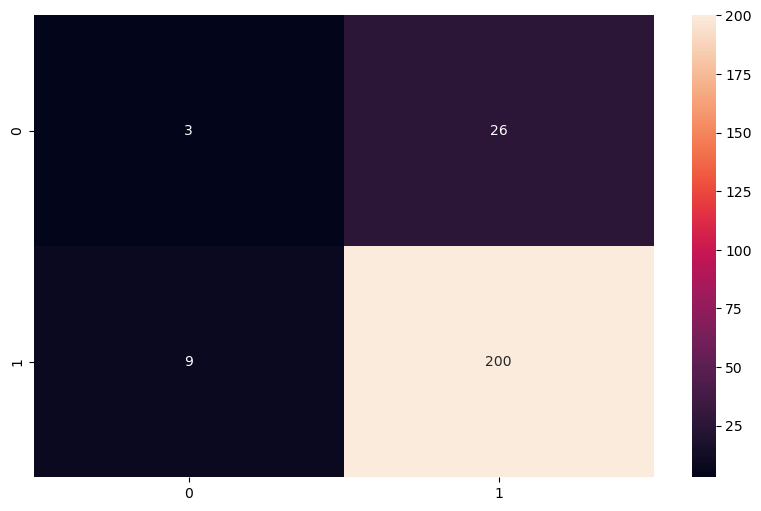

In [164]:

#confusion matrix
matrix = confusion_matrix(new_y_test, predictions)
print(classification_report(new_y_test, predictions))
print('Confusion Matrix of neural networks')
print(matrix)
# plt.figure()
# plot_confusion_matrix(matrix,new_y_test,X)
# plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_title('Confusion Matrx for neural network')
# ax.set_xlabel('Time label')
# ax.set_ylabel('predicted label')
plt.xlabel('Time label', axes=ax)
plt.ylabel('predicted label', axes=ax)

f = sns.heatmap(matrix, annot=True, fmt='d')

Text(95.72222222222221, 0.5, 'predicted label')

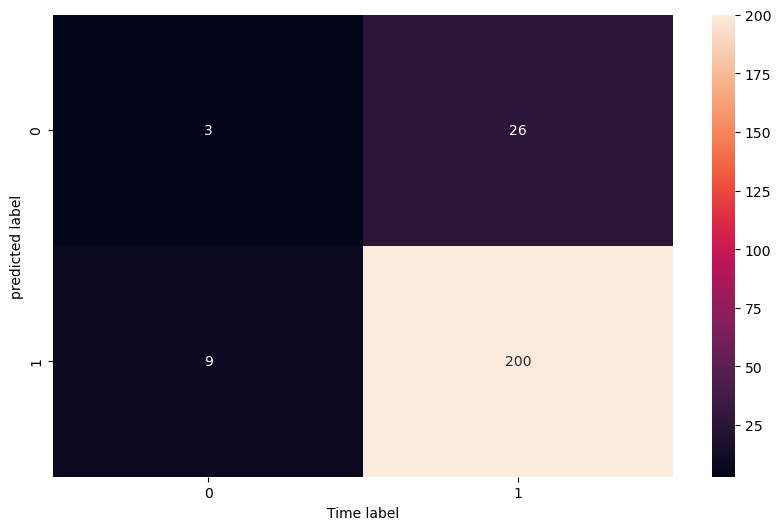

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_title('Confusion Matrx for neural network')
# ax.set_xlabel('Time label')
# ax.set_ylabel('predicted label')
f = sns.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Time label', axes=ax)
plt.ylabel('predicted label', axes=ax)



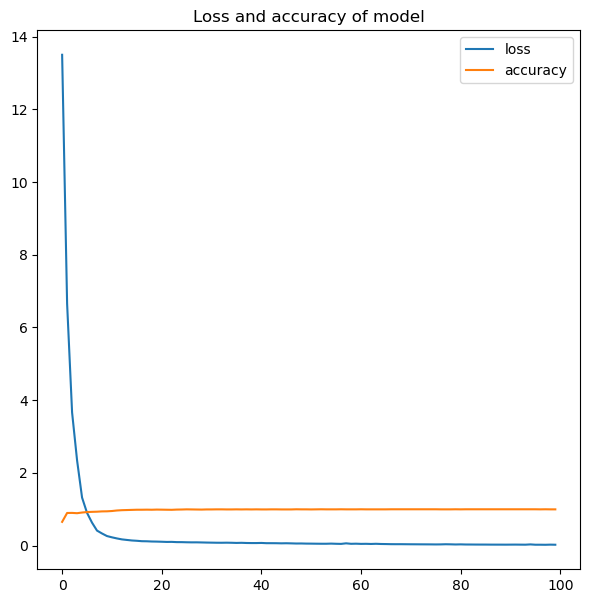

In [18]:
#Plotting a histogram over the 7 epocs and plotting the accuracy and loss
history = pd.DataFrame(classifier.history)
plt.figure(figsize=(7,7));
plt.plot(history["loss"],label="loss");
plt.plot(history["accuracy"],label='accuracy');
plt.legend();
plt.title("Loss and accuracy of model");
plt.show();


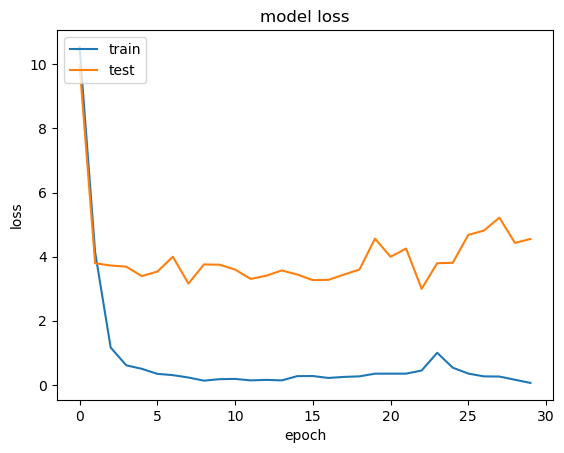

In [162]:
 # Loss plotting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

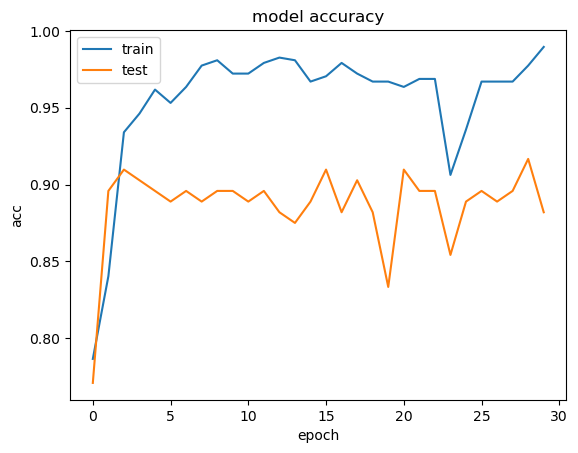

In [163]:
 # Accuracy plotting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [72]:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

8/8 [==============================] - 0s 8ms/step - loss: 1.9462 - accuracy: 0.8697
score: 1.95
accuracy: 0.87


In [20]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [173]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = "Hi i'm anuhya"
#cmnt =['Kill em.']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
print(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
print(np.argmax(sentiment))
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[1775], [1], [], [1], [], [], [], [6], [], [207], [1775], [], [6]]
[[   0    0    0 ...    0    0 1775]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0 1775]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    6]]
7/7 - 0s - 58ms/epoch - 8ms/step
1
positive


Logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [89]:
genre_list = fb.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
# scaler = StandardScaler()
# Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(482, 203) (482,)
(238, 203) (238,)


In [90]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [91]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [92]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

/Users/anuhyakalvakala/miniforge3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
Y_test

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [94]:
print('Predicted value is =', lm.predict([X_test[10]]))

print('Actual value from test data is ' ,Y_test[10] )

Predicted value is = [1]
Actual value from test data is  1


In [95]:
lm.score(X_test, Y_test)

0.8151260504201681

/Users/anuhyakalvakala/miniforge3/envs/ds/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[  7,  22],
       [ 22, 187]])

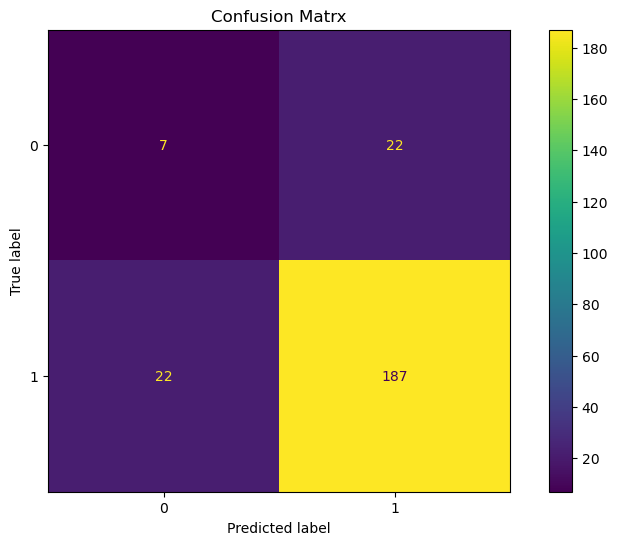

In [96]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X_test, Y_test, ax = ax)
disp.confusion_matrix

In [97]:
print(metrics.classification_report(Y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.24      0.24      0.24        29
           1       0.89      0.89      0.89       209

    accuracy                           0.82       238
   macro avg       0.57      0.57      0.57       238
weighted avg       0.82      0.82      0.82       238



#face recognition

In [2]:
!pip3 install deepface

  Using cached deepface-0.0.75-py3-none-any.whl (65 kB)
  Using cached fire-0.4.0.tar.gz (87 kB)
  Preparing metadata (setup.py) ... done
  Using cached gdown-4.5.4-py3-none-any.whl (14 kB)
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached retina_face-0.0.12-py3-none-any.whl (15 kB)
  Using cached deepface-0.0.74-py3-none-any.whl (63 kB)
  Using cached deepface-0.0.73-py3-none-any.whl (63 kB)
  Using cached deepface-0.0.72-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.71-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.70-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.69-py3-none-any.whl (62 kB)
  Using cached deepface-0.0.68-py3-none-any.whl (61 kB)
  Using cached deepface-0.0.67-py3-none-any.whl (61 kB)
  Using cached deepface-0.0.66-py3-none-any.whl (61 kB)
  Using cached deepface-0.0.65-py3-none-any.whl (59 kB)
  Using cached deepface-0.0.64-py3-none-any.whl (59 kB)
  Using cached deepface-0.0.63-py3-none-any.whl (60 kB)
  Using cached deepface-0.

In [5]:
print(tf. __version__)

2.10.0


In [1]:
#emotion_detection.py
import cv2
from deepface import DeepFace
import numpy as np  #this will be used later in the process

imgpath = '/Users/anuhyakalvakala/Desktop/saikiran.jpg'  #put the image where this file is located and put its name here
image = cv2.imread(imgpath)

analyze = DeepFace.analyze(image,actions=['emotions'])  #here the first parameter is the image we want to analyze #the second one there is the action
print(analyze)

ModuleNotFoundError: No module named 'deepface'